<a href="https://colab.research.google.com/github/Gabriel-Paes/ml-regression/blob/main/DecisonTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carregando o conjunto de dados California Housing
california = fetch_california_housing()
X = california.data
y = california.target



In [3]:
# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_test.shape

(6192, 8)

In [5]:
# Pré-processamento: Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Inicializando o regressor de Árvore de Decisão com parâmetros específicos
dt_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_leaf=5, random_state=42)

# Treinando o modelo
dt_regressor.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = dt_regressor.predict(X_test_scaled)



In [7]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.5211334618725708
R^2 Score: 0.6029580667515306


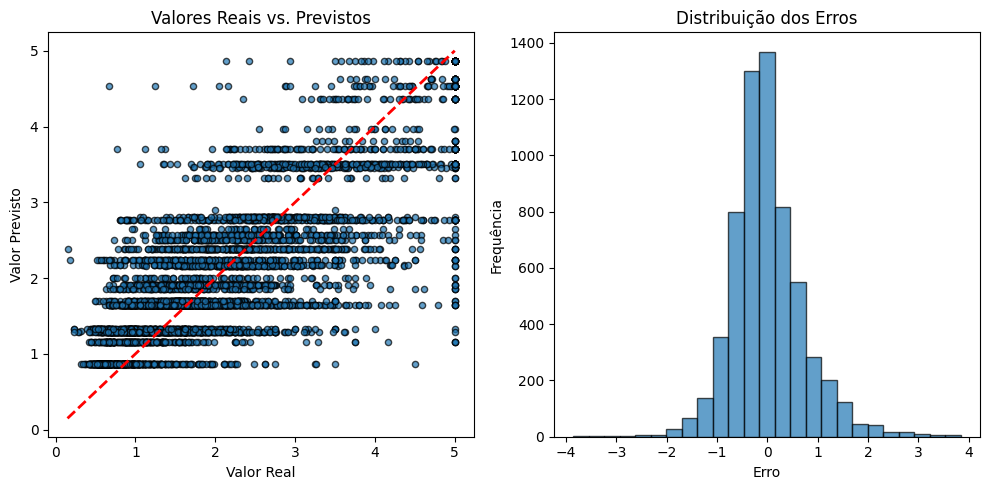

In [8]:
# Função para plotar os resultados
def plot_results(y_test, y_pred):
    plt.figure(figsize=(10, 5))

    # Gráfico de valores reais vs. previstos
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.title('Valores Reais vs. Previstos')

    # Gráfico de erros
    errors = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.hist(errors, bins=25, edgecolor='k', alpha=0.7)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos Erros')

    plt.tight_layout()
    plt.show()

# Plotando os resultados
plot_results(y_test, y_pred)

In [9]:
# Selecionando um subconjunto aleatório de 1000 amostras de teste
indices = np.random.choice(len(y_test), size=1000, replace=False)
y_test_subset = y_test[indices]
y_pred_subset = y_pred[indices]

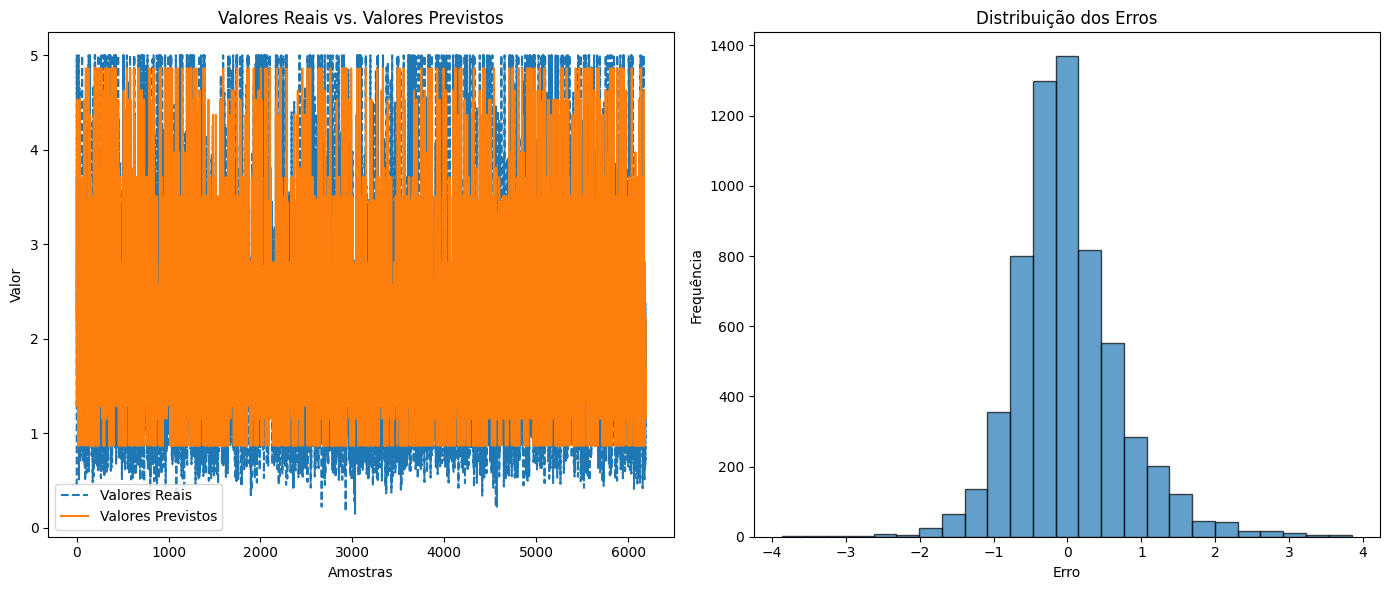

In [10]:
def plot_results(y_test, y_pred):
    plt.figure(figsize=(14, 6))

    # Gráfico de valores reais vs. previstos (Gráfico de Linhas)
    plt.subplot(1, 2, 1)
    plt.plot(y_test, label='Valores Reais', linestyle='--')
    plt.plot(y_pred, label='Valores Previstos', linestyle='-')
    plt.xlabel('Amostras')
    plt.ylabel('Valor')
    plt.title('Valores Reais vs. Valores Previstos')
    plt.legend()

    # Gráfico de erros
    errors = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.hist(errors, bins=25, edgecolor='k', alpha=0.7)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos Erros')

    plt.tight_layout()
    plt.show()

# Plotando os resultados
plot_results(y_test, y_pred)

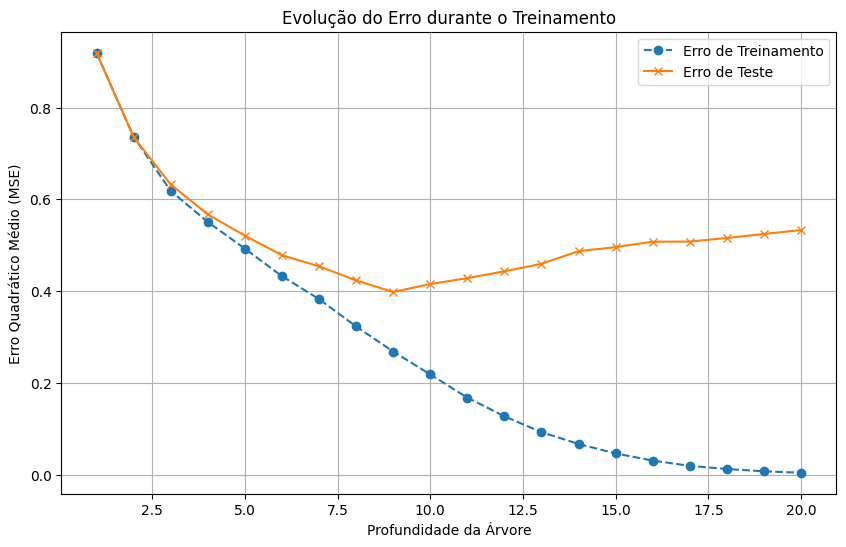

In [11]:
# Evolução do erro durante o treinamento
depths = range(1, 21)
train_errors = []
test_errors = []

for depth in depths:
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_regressor.fit(X_train_scaled, y_train)
    y_train_pred = dt_regressor.predict(X_train_scaled)
    y_test_pred = dt_regressor.predict(X_test_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Erro de Treinamento', linestyle='--', marker='o')
plt.plot(depths, test_errors, label='Erro de Teste', linestyle='-', marker='x')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Evolução do Erro durante o Treinamento')
plt.legend()
plt.grid(True)
plt.show()